# Analiza wydajności metod mnożenia macierzy

1. Naiwna metoda (potrójne pętle w naturalnej kolejności)
2. Ulepszona metoda (ze zamienioną kolejnością pętli)
3. Implementacja z użyciem BLAS (poprzez GSL)


In [7]:
using DataFrames
using CSV
using Plots
using Statistics

## Wczytanie danych z pliku CSV

Najpierw wczytamy dane wygenerowane przez program w C:

In [8]:
# Wczytanie danych bez optymalizacji kompilatora
df_no_opt = CSV.read("results_no_opt.csv", DataFrame)
println("Dane bez optymalizacji:")
df_no_opt

Dane bez optymalizacji:


Row,Rozmiar,Naiwna,Ulepszona,BLAS
,Int64,Float64,Float64,Float64
1,100,0.003767,0.002119,0.00042
2,200,0.02783,0.015892,0.003175
3,300,0.093196,0.055949,0.010685
4,400,0.222499,0.130524,0.025379
5,500,0.439732,0.267648,0.064738
6,600,0.760169,0.478575,0.110445
7,700,1.30135,0.765503,0.156611
8,800,1.82946,1.59432,0.245967
9,900,2.6321,1.66288,0.393837


In [9]:
df_opt = CSV.read("results_opt.csv", DataFrame)
println("Dane z optymalizacją:")
df_opt

Dane z optymalizacją:


Row,Rozmiar,Naiwna,Ulepszona,BLAS
,Int64,Float64,Float64,Float64
1,100,0.000951,0.000492,0.000455
2,200,0.00732,0.003422,0.00362
3,300,0.026552,0.009516,0.00995
4,400,0.065702,0.026594,0.026249
5,500,0.134627,0.059845,0.059391
6,600,0.239504,0.111017,0.104934
7,700,0.389711,0.193764,0.170102
8,800,0.600157,0.889076,0.303193
9,900,0.879645,0.442465,0.368705


## Wizualizacja wyników bez optymalizacji kompilatora

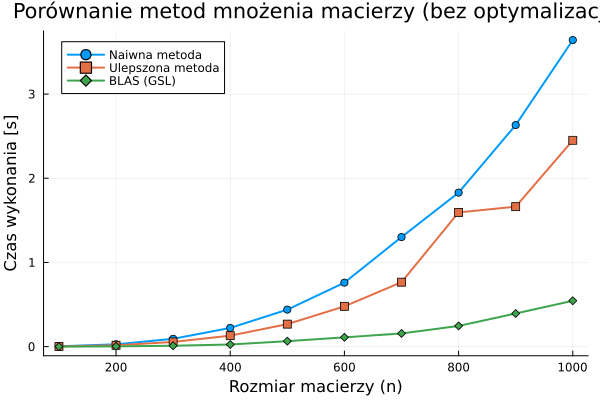

In [10]:
p1 = plot(df_no_opt.Rozmiar, df_no_opt.Naiwna, 
    label="Naiwna metoda", 
    xlabel="Rozmiar macierzy (n)", 
    ylabel="Czas wykonania [s]",
    title="Porównanie metod mnożenia macierzy (bez optymalizacji)",
    lw=2, marker=:circle, markersize=4)

plot!(p1, df_no_opt.Rozmiar, df_no_opt.Ulepszona, 
    label="Ulepszona metoda", 
    lw=2, marker=:square, markersize=4)

plot!(p1, df_no_opt.Rozmiar, df_no_opt.BLAS, 
    label="BLAS (GSL)", 
    lw=2, marker=:diamond, markersize=4)

display(p1)

## Analiza przyspieszenia względem naiwnej metody

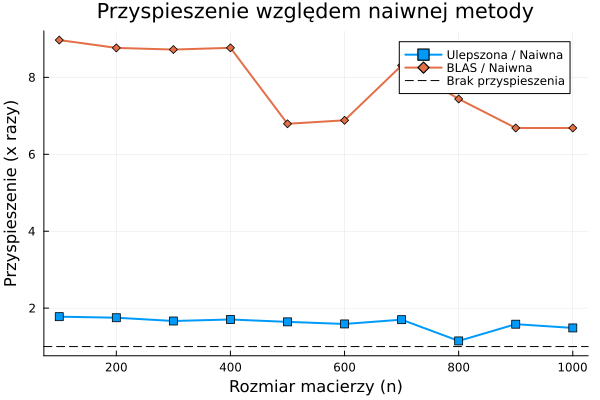

In [11]:
df_no_opt[!, :Przyspieszenie_Ulepszona] = df_no_opt.Naiwna ./ df_no_opt.Ulepszona
df_no_opt[!, :Przyspieszenie_BLAS] = df_no_opt.Naiwna ./ df_no_opt.BLAS

p2 = plot(df_no_opt.Rozmiar, df_no_opt.Przyspieszenie_Ulepszona, 
    label="Ulepszona / Naiwna", 
    xlabel="Rozmiar macierzy (n)", 
    ylabel="Przyspieszenie (x razy)",
    title="Przyspieszenie względem naiwnej metody",
    lw=2, marker=:square, markersize=4)

plot!(p2, df_no_opt.Rozmiar, df_no_opt.Przyspieszenie_BLAS, 
    label="BLAS / Naiwna", 
    lw=2, marker=:diamond, markersize=4)

hline!(p2, [1.0], label="Brak przyspieszenia", ls=:dash, color=:black)

display(p2)

## Porównanie z optymalizacją kompilatora (dla chętnych)

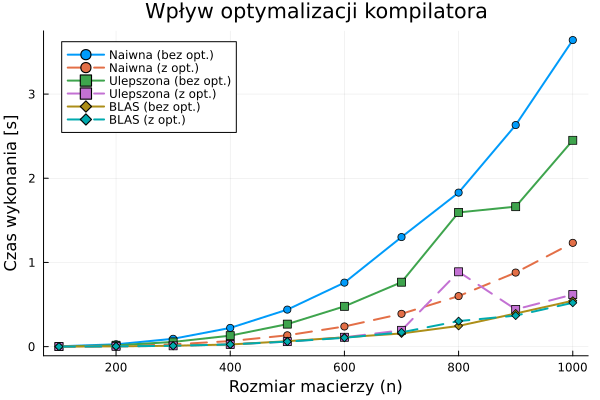

In [12]:
p3 = plot(title="Wpływ optymalizacji kompilatora", xlabel="Rozmiar macierzy (n)", ylabel="Czas wykonania [s]")

# Naiwna metoda
plot!(p3, df_no_opt.Rozmiar, df_no_opt.Naiwna, label="Naiwna (bez opt.)", lw=2, marker=:circle, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.Naiwna, label="Naiwna (z opt.)", lw=2, ls=:dash, marker=:circle, markersize=4)

# Ulepszona metoda
plot!(p3, df_no_opt.Rozmiar, df_no_opt.Ulepszona, label="Ulepszona (bez opt.)", lw=2, marker=:square, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.Ulepszona, label="Ulepszona (z opt.)", lw=2, ls=:dash, marker=:square, markersize=4)

# BLAS
plot!(p3, df_no_opt.Rozmiar, df_no_opt.BLAS, label="BLAS (bez opt.)", lw=2, marker=:diamond, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.BLAS, label="BLAS (z opt.)", lw=2, ls=:dash, marker=:diamond, markersize=4)

display(p3)